<a href="https://colab.research.google.com/github/fboldt/aulasml/blob/master/aula2b_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [84]:
X, y = dataset.data, dataset.target
X.shape, y.shape

((569, 30), (569,))

In [97]:
from sklearn.model_selection import train_test_split
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42)

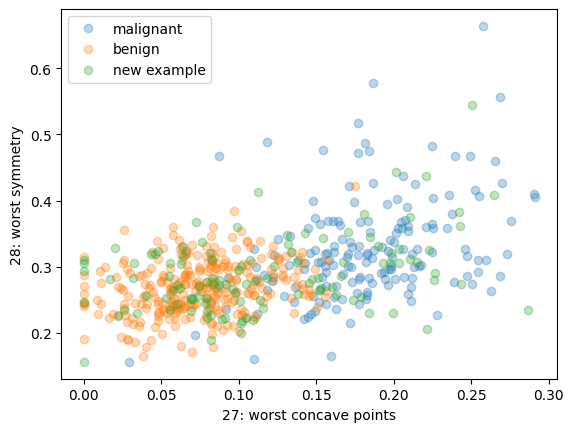

In [98]:
import matplotlib.pyplot as plt
i, j = 27, 28
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
for k in set(ytr):
  plt.plot(Xtr[:,i][ytr==k], Xtr[:,j][ytr==k], "o", alpha=0.3,
           label=f"{dataset.target_names[k]}")
plt.plot(Xte[:,i], Xte[:,j], "o", alpha=0.3, label=f"new example")
plt.legend()
plt.show()

In [101]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
class knn(BaseEstimator, ClassifierMixin):
  def fit(self, X, y):
    self.X = X
    self.y = y
  def distancia(self, x):
    diferenca = self.X - x
    quadrado = diferenca**2
    soma = np.sum(quadrado, axis=1)
    raiz = np.sqrt(soma)
    return raiz
  def predict(self, X):
    ypred = np.empty((X.shape[0],))
    for i in range(X.shape[0]):
      distancias = self.distancia(X[i])
      vizinho = np.argmin((distancias))
      ypred[i] = self.y[vizinho]
    return ypred


In [88]:
from sklearn.metrics import accuracy_score
modelo = knn()
modelo.fit(Xtr, ytr)
accuracy_score(ytr, modelo.predict(Xtr)), accuracy_score(yte, modelo.predict(Xte))

(1.0, 0.9298245614035088)

In [89]:
np.max(X,axis=0)-np.min(X,axis=0), np.std(X,axis=0)

(array([2.11290e+01, 2.95700e+01, 1.44710e+02, 2.35750e+03, 1.10770e-01,
        3.26020e-01, 4.26800e-01, 2.01200e-01, 1.98000e-01, 4.74800e-02,
        2.76150e+00, 4.52480e+00, 2.12230e+01, 5.35398e+02, 2.94170e-02,
        1.33148e-01, 3.96000e-01, 5.27900e-02, 7.10680e-02, 2.89452e-02,
        2.81100e+01, 3.75200e+01, 2.00790e+02, 4.06880e+03, 1.51430e-01,
        1.03071e+00, 1.25200e+00, 2.91000e-01, 5.07300e-01, 1.52460e-01]),
 array([3.52095076e+00, 4.29725464e+00, 2.42776193e+01, 3.51604754e+02,
        1.40517641e-02, 5.27663291e-02, 7.96497253e-02, 3.87687325e-02,
        2.73901809e-02, 7.05415588e-03, 2.77068942e-01, 5.51163427e-01,
        2.02007710e+00, 4.54510134e+01, 2.99987837e-03, 1.78924359e-02,
        3.01595231e-02, 6.16486075e-03, 8.25910439e-03, 2.64374475e-03,
        4.82899258e+00, 6.14085432e+00, 3.35730016e+01, 5.68856459e+02,
        2.28123569e-02, 1.57198171e-01, 2.08440875e-01, 6.56745545e-02,
        6.18130785e-02, 1.80453893e-02]))

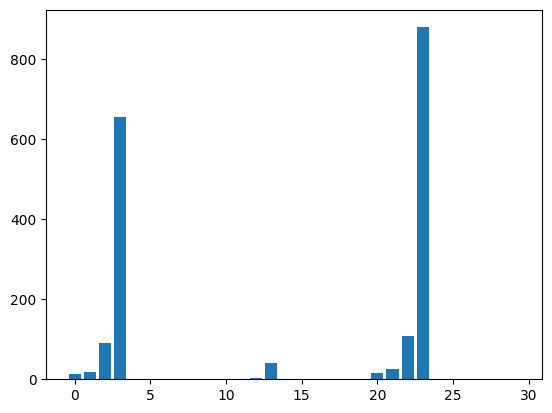

In [90]:
plt.bar(list(range(X.shape[1])), np.mean(X, axis=0))
plt.show()

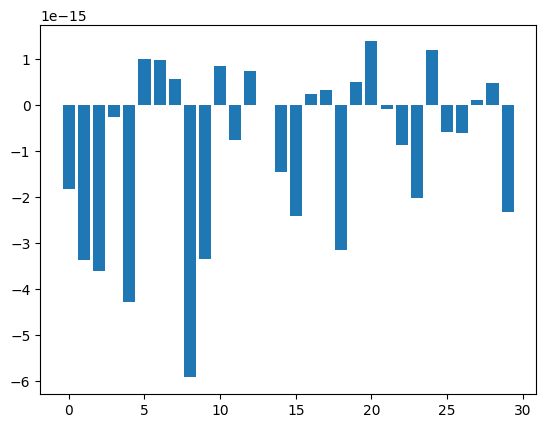

In [91]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xtr = scaler.fit_transform(Xtr)
Xte = scaler.transform(Xte)
plt.bar(list(range(X.shape[1])), np.mean(Xtr, axis=0))
plt.show()

In [103]:
modelo = knn()
modelo.fit(Xtr, ytr)
accuracy_score(ytr, modelo.predict(Xtr)),accuracy_score(yte, modelo.predict(Xte))

(1.0, 0.9298245614035088)

In [113]:
from sklearn.model_selection import cross_validate

scores = cross_validate(modelo, X, y)
scores["test_score"], np.mean(scores["test_score"])

(array([0.85964912, 0.92982456, 0.9122807 , 0.9122807 , 0.91150442]),
 0.9051079024996118)

In [115]:
from sklearn.pipeline import Pipeline

modelo = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", knn())
])

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42)

modelo.fit(Xtr, ytr)
accuracy_score(yte, modelo.predict(Xte))

0.9385964912280702

In [116]:
scores = cross_validate(modelo, X, y)
scores["test_score"], np.mean(scores["test_score"])

(array([0.95614035, 0.97368421, 0.97368421, 0.92982456, 0.9380531 ]),
 0.9542772861356932)